# Final exam

__<div style="text-align: right"> EE370: Software lab, Kyung Hee University. </div>__
_<div style="text-align: right"> Jong-Han Kim (jonghank@khu.ac.kr) </div>_

This exam contains one open question. _Your answers should be turned in to the instructor and the course assistant no later than 5:20pm on June 24th, and you are not allowed to discuss the exam with anyone until then._ The only exception is when you email the instructor for clarification.

Your answers should be as concise as possible while self-explaining that the presented results are reasonable. **_Poorly presented answers or list of graphs without any explanation, for which the graders have to closely examine or even run the code to check the correctness, will get no credit._** We suggest you spend at least an hour in carefully writing down concise explanations on your results.

Write your student ID and name below. **_Typing your name implies that you acknowledge and accept the Kyung Hee University Honor Code._**

<br>

- STUDENT ID: 2019103980

- STUDENT NAME: 송민철

<br>

_Kyung Hee University Honor Code:_

1. The honor code is a commitment of students, individually and collectively, that they will not provide or receive any impermissible aid in examinations as well as other activities used as the basis of grading, and that they will do their best for the sake of the integrity of the community.
2. The faculty also assumes obligations to provide students with the environment in which students can best practice the honor code, and does its part in building the academic integrity of the community.

<br>

---
## Spread of COVID-19

Running the following cell loads countrywise daily records of the confirmed, recovered, and death cases of COVID-19 disease. 

Use whatever techniques that we have discussed in class to explore, analyze, discover, and present some meaningful results from these dataset. 

You might be interested in comparing the effectiveness of the disease control policies of different countries, or might want to make some predictions on future spread of this deadly disease; these were just examples and you choose what you want to do. Good answers should contain some graphical presentaions with rich explanations supporting your logic, analysis, and conclusion.


In [1]:
import pandas as pd
confirmed = pd.read_csv('https://jonghank.github.io/ee370/files/ee370-confirmed.csv')
recovered = pd.read_csv('https://jonghank.github.io/ee370/files/ee370-recovered.csv')
deaths    = pd.read_csv('https://jonghank.github.io/ee370/files/ee370-deaths.csv')

In [2]:
import numpy as np
import matplotlib.pyplot as plt

모든 국가의 데이터를 분석하는 것은 너무 시간이 오래 걸리기 때문에, 몇 개 정도의 국가만 택하여 분석할 것이다. 지금은 한국, 그리고 코로나19의 감염자 수가 제일 많은 국가들인 미국, 브라질, 러시아, 인도의 데이터를 분석할 것이다.

In [3]:
confirmed_selected = confirmed.copy()
recovered_selected = recovered.copy()
deaths_selected = deaths.copy()

countriesList = ['Korea, South', 'US', 'Brazil', 'Russia', 'India']

for i in range(len(confirmed_selected)):
  if not (confirmed_selected.loc[i, "Country/Region"] in countriesList):
    confirmed_selected = confirmed_selected.drop(i)

for i in range(len(recovered_selected)):
  if not (recovered_selected.loc[i, "Country/Region"] in countriesList):
    recovered_selected = recovered_selected.drop(i)

for i in range(len(deaths_selected)):
  if not (deaths_selected.loc[i, "Country/Region"] in countriesList):
    deaths_selected = deaths_selected.drop(i)

confirmed_selected.reset_index(inplace=True)
recovered_selected.reset_index(inplace=True)
deaths_selected.reset_index(inplace=True)

confirmed_selected.drop('index', axis=1, inplace=True)
confirmed_selected.drop('Province/State', axis=1, inplace=True)
confirmed_selected.drop('Lat', axis=1, inplace=True)
confirmed_selected.drop('Long', axis=1, inplace=True)

recovered_selected.drop('index', axis=1, inplace=True)
recovered_selected.drop('Province/State', axis=1, inplace=True)
recovered_selected.drop('Lat', axis=1, inplace=True)
recovered_selected.drop('Long', axis=1, inplace=True)

deaths_selected.drop('index', axis=1, inplace=True)
deaths_selected.drop('Province/State', axis=1, inplace=True)
deaths_selected.drop('Lat', axis=1, inplace=True)
deaths_selected.drop('Long', axis=1, inplace=True)

아래 표는 각각 확진자, 완치자, 사망자 수이다.

In [4]:
confirmed_selected

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20
0,Brazil,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,...,178214,190137,203165,220291,233511,241080,255368,271885,291579,310087,330890,347398,363211,374898,391222,411821,438238,465166,498440,514849,526447,555383,584016,614941,645771,672846,691758,707412,739503,772416,802828,828810,850514,867624,888271,923189,955377,978142,1032913,1032913
1,India,0,0,0,0,0,0,0,0,1,1,1,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,...,74292,78055,81997,85784,90648,95698,100328,106475,112028,118226,124794,131423,138536,144950,150793,158086,165386,173491,181827,190609,198370,207191,216824,226713,236184,246622,257486,265928,276146,286605,297535,308993,320922,332424,343091,354065,366946,380532,395048,410451
2,"Korea, South",1,1,2,2,3,4,4,4,4,11,12,15,15,16,19,23,24,24,25,27,28,28,28,28,28,29,30,31,31,104,204,433,602,833,977,1261,1766,2337,3150,...,10962,10991,11018,11037,11050,11065,11078,11110,11122,11142,11165,11190,11206,11225,11265,11344,11402,11441,11468,11503,11541,11590,11629,11668,11719,11776,11814,11852,11902,11947,12003,12051,12085,12121,12155,12198,12257,12306,12373,12421
3,Russia,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...,232243,242271,252245,262843,272043,281752,290678,299941,308705,317554,326448,335882,344481,353427,362342,370680,379051,387623,396575,405843,414328,423186,431715,440538,449256,458102,467073,476043,484630,493023,501800,510761,519458,528267,536484,544725,552549,560321,568292,576162
4,US,1,1,2,2,5,5,5,5,5,7,8,8,11,11,11,11,11,11,11,11,12,12,13,13,13,13,13,13,13,13,15,15,15,15,15,15,16,16,24,...,1374914,1396109,1423726,1449026,1474127,1493131,1514839,1535337,1558949,1584486,1608623,1630450,1651239,1670209,1689057,1707423,1730259,1754747,1778993,1799122,1816476,1837367,1857248,1878543,1903854,1926538,1944309,1961781,1979868,2000702,2023590,2048986,2074526,2094058,2114026,2137731,2163290,2191052,2222579,2255119


In [5]:
recovered_selected

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20
0,Brazil,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,72597,78424,79479,84970,89672,94122,100459,106794,116683,125960,135430,142587,149911,153833,158593,166647,177604,189476,200892,206555,211080,223638,238617,254963,266940,277149,283952,378257,396737,413916,429965,445123,459436,469141,477709,490005,521046,534580,551631,576779
1,India,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,...,24420,26400,27969,30258,34224,36795,39233,42309,45422,48553,51824,54385,57692,60706,64277,67749,70920,82627,86936,91852,95754,100285,104071,108450,113233,118695,123848,129095,134670,135206,147195,154330,162379,169798,180013,186935,194325,204711,213831,227728
2,"Korea, South",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,3,3,7,7,7,9,9,10,12,12,16,16,16,18,18,22,22,22,22,27,...,9695,9762,9821,9851,9888,9904,9938,10066,10135,10162,10194,10213,10226,10275,10295,10340,10363,10398,10405,10422,10446,10467,10499,10506,10531,10552,10563,10589,10611,10654,10669,10691,10718,10730,10760,10774,10800,10835,10856,10868
3,Russia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...,43512,48003,53530,58226,63166,67373,70209,76130,85392,92681,99825,107936,113299,118798,131129,142208,150993,159257,167469,171883,175514,186602,195559,204197,212237,220935,226272,230226,241917,252295,260649,268862,274128,279536,284021,293780,303800,313409,323851,334024
4,US,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,3,3,3,3,3,3,3,3,3,3,5,5,5,5,6,6,6,7,7,...,230287,243430,246414,250747,268376,272265,283178,289392,294312,298418,350135,361239,366736,379157,384902,391508,399991,406446,416461,444758,458231,463868,479258,485002,491706,500849,506367,518522,524855,533504,540292,547386,556606,561816,576334,583503,592191,599115,606715,617460


In [6]:
deaths_selected

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20
0,Brazil,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,12461,13240,13999,14962,15662,16118,16853,17983,18859,20047,21048,22013,22666,23473,24512,25598,26754,27878,28834,29314,29937,31199,32548,34021,35026,35930,36455,37134,38406,39680,40919,41828,42720,43332,43959,45241,46510,47748,48954,49976
1,India,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2415,2551,2649,2753,2871,3025,3156,3302,3434,3584,3726,3868,4024,4172,4344,4534,4711,4980,5185,5408,5608,5829,6088,6363,6649,6946,7207,7473,7750,8102,8498,8884,9195,9520,9900,11903,12237,12573,12948,13254
2,"Korea, South",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,6,8,10,12,13,13,16,...,259,260,260,262,262,263,263,263,264,264,266,266,267,269,269,269,269,269,270,271,272,273,273,273,273,273,273,274,276,276,277,277,277,277,278,279,280,280,280,280
3,Russia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2116,2212,2305,2418,2537,2631,2722,2837,2972,3099,3249,3388,3541,3633,3807,3968,4142,4374,4555,4693,4849,5031,5208,5376,5520,5717,5851,5963,6134,6350,6522,6705,6819,6938,7081,7274,7468,7650,7831,7992
4,US,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,82709,84452,86229,87862,89084,89893,90683,92252,93775,95020,96296,97406,98039,98541,99239,100744,101937,103113,104054,104659,105430,106461,107444,108479,109449,110124,110575,111068,112014,112935,113823,114669,115436,115732,116127,116963,117717,118432,119124,119719


감염 데이터 분석에는 총 확진자, 완치자, 사망자 이외에도 현재 확진자(active case)의 수도 중요하기 때문에 이에 해당되는 DataFrame도 만들 것이다.

In [7]:
active_selected = confirmed_selected.copy()
active_selected.iloc[:,2:len(active_selected.columns)] -= recovered_selected.iloc[:,2:len(recovered_selected.columns)]
active_selected.iloc[:,2:len(active_selected.columns)] -= deaths_selected.iloc[:,2:len(deaths_selected.columns)]

In [8]:
active_selected

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20
0,Brazil,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,...,93156,98473,109687,120359,128177,130840,138056,147108,156037,164080,174412,182798,190634,197592,208117,219576,233880,247812,268714,278980,285430,300546,312851,325957,343805,359767,371351,292021,304360,318820,331944,341859,348358,355151,366603,387943,387821,395814,432328,406158
1,India,0,0,0,0,0,0,0,0,1,1,1,2,3,3,3,3,3,3,3,3,3,3,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,47457,49104,51379,52773,53553,55878,57939,60864,63172,66089,69244,73170,76820,80072,82172,85803,89755,85884,89706,93349,97008,101077,106665,111900,116302,120981,126431,129360,133726,143297,141842,145779,149348,153106,153178,155227,160384,163248,168269,169469
2,"Korea, South",1,1,2,2,3,4,4,4,4,11,12,15,15,16,19,23,23,23,22,24,25,21,21,21,19,20,20,19,19,87,186,415,578,807,945,1227,1731,2302,3107,...,1008,969,937,924,900,898,877,781,723,716,705,711,713,681,701,735,770,774,793,810,823,850,857,889,915,951,978,989,1015,1017,1057,1083,1090,1114,1117,1145,1177,1191,1237,1273
3,Russia,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,186615,192056,196410,202199,206340,211748,217747,220974,220341,221774,223374,224558,227641,230996,227406,224504,223916,223992,224551,229267,233965,231553,230948,230965,231499,231450,234950,239854,236579,234378,234629,235194,238511,241793,245382,243671,241281,239262,236610,234146
4,US,1,1,2,2,5,5,5,5,5,7,8,8,11,11,11,11,11,11,8,8,9,9,10,10,10,10,10,10,10,10,10,10,10,10,9,9,10,9,16,...,1061918,1068227,1091083,1110417,1116667,1130973,1140978,1153693,1170862,1191048,1162192,1171805,1186464,1192511,1204916,1215171,1228331,1245188,1258478,1249705,1252815,1267038,1270546,1285062,1302699,1315565,1327367,1332191,1342999,1354263,1369475,1386931,1402484,1416510,1421565,1437265,1453382,1473505,1496740,1517940


이제 그래프를 그려서 각 국가에서 현재까지 감염자 수가 어떻게 증가하고 있는지 대략 확인해볼 것이다. 첫 번째 그래프는 각 국의 사망자/완치자/현재 감염자 수의 누적 분포 그래프를 따로 그려둔 것이며, 두 번째 그래프는 각 국의 총 확진자 수를 같은 공간 안에 그려둔 것이다. x축은 관찰 시작 일자(2020년 1월 22일) 이후 경과한 일 수이며, y축은 확진자 수이다.

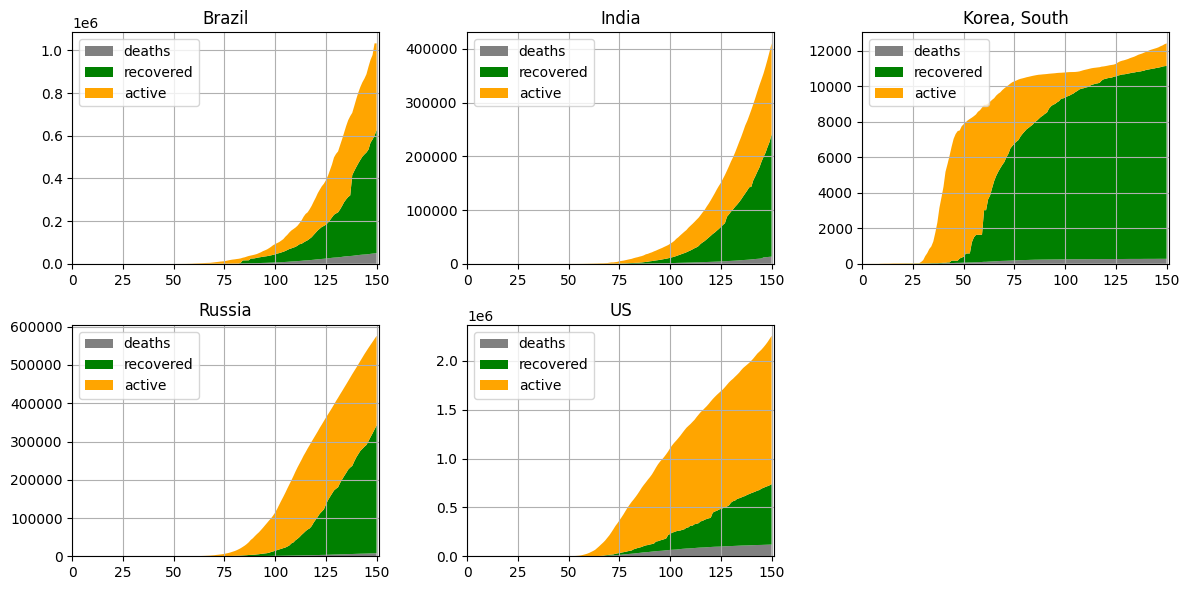

In [9]:
plt.figure(figsize=(12,6), dpi=100)
for i in range(5):
  plt.subplot(2, 3, i+1)
  plt.stackplot([i for i in range(len(deaths_selected.columns)-1)], list(deaths_selected.iloc[i,1:].values), list(recovered_selected.iloc[i,1:].values), \
                list(active_selected.iloc[i,1:].values), colors=['gray', 'green', 'orange'])
  plt.title(deaths_selected.loc[i, "Country/Region"])
  plt.xlim(0, (len(deaths_selected.columns)-1))
  plt.grid()
  plt.legend(['deaths', 'recovered', 'active'], loc='upper left')

plt.tight_layout()
plt.show()

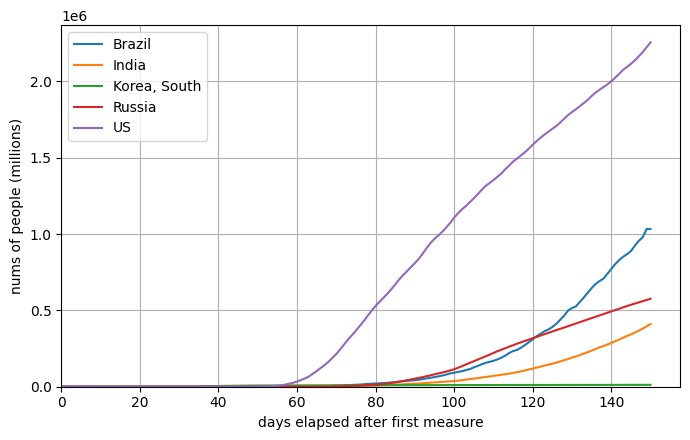

In [10]:
plt.figure(figsize=(7,4.5), dpi=100)
for i in range(5):
  plt.plot([i for i in range(len(deaths_selected.columns)-1)], list(confirmed_selected.iloc[i,1:].values))

plt.xlim(0)
plt.ylim(0)
plt.xlabel("days elapsed after first measure")
plt.ylabel("nums of people (millions)")
plt.grid()
plt.legend([deaths_selected.loc[i, "Country/Region"] for i in range(5)])
plt.tight_layout()
plt.show()

위의 그래프를 보면 현재 확진자가 가장 급격히 증가하는 국가는 인도이며, 브라질의 경우에도 확진자의 증가율이 상당히 높다. 러시아와 미국에서는 확진자의 수가 선형적으로 증가하고 있으며, 한국의 경우 어느 정도 안정적으로 active case가 줄어들고 있었지만 125일 이후부터 이태원 클럽 집단감염으로 인해 active case가 다시 증가하고 있다. 확진자 대비 사망자 수(치사율)은 미국과 브라질이 다른 국가에 비해 높은 편이다.

이제 지금 있는 자료들을 통해 미래의 추세를 예측해보자. 먼저 작업을 편리하게 하기 위해 아래 코드처럼 각 국가별로 확진자, 완치자, 사망자, active case의 정보를 담은 array를 만든다.

In [11]:
brazil = np.array([confirmed_selected.iloc[0,1:], recovered_selected.iloc[0,1:], deaths_selected.iloc[0,1:], active_selected.iloc[0,1:]], dtype=int)
india  = np.array([confirmed_selected.iloc[1,1:], recovered_selected.iloc[1,1:], deaths_selected.iloc[1,1:], active_selected.iloc[1,1:]], dtype=int)
korea  = np.array([confirmed_selected.iloc[2,1:], recovered_selected.iloc[2,1:], deaths_selected.iloc[2,1:], active_selected.iloc[2,1:]], dtype=int)
russia = np.array([confirmed_selected.iloc[3,1:], recovered_selected.iloc[3,1:], deaths_selected.iloc[3,1:], active_selected.iloc[3,1:]], dtype=int)
us     = np.array([confirmed_selected.iloc[4,1:], recovered_selected.iloc[4,1:], deaths_selected.iloc[4,1:], active_selected.iloc[4,1:]], dtype=int)

먼저 한국의 데이터를 supervised learning 강좌에서 사용했던 방식으로 분석해보자( https://nbviewer.jupyter.org/gist/jonghank/fdd74281cc621344e8d3f6b1ce9a62b0 참고). 먼저 한국의 확진자, 완치자, 사망자, 감염자, active case를 각각 표준화한다.

In [12]:
korea_z = np.array([(korea[i] - korea[i].mean())/korea[i].std() for i in range(4)], dtype=float)

h=60으로 설정하고 데이터를 분석한다. 즉, 60일간의 데이터를 이용해 현재까지의 확진자 추세를 분석한다.

In [13]:
h = 90
T = len(korea[0])
X = np.zeros((T-h, h+1))
y = np.zeros(T-h)

for row in range(len(X)):
  for col in range(len(X[row])):
    if col == 0:
      X[row,col] = 1
    else:
      X[row,col] = korea_z[0][row + col - 1]

for i in range(len(y)):
  y[i] = korea_z[0][h+i]

theta = np.linalg.lstsq(X, y, rcond=0)[0]

이를 기반으로, 미래의 90일동안의 확진자 추세를 예측할 수 있다.

In [14]:
korea_z_hat_confirmed = list(korea_z[0].copy())

for i in range(90):
  temp = [1]
  temp.extend(korea_z_hat_confirmed[-h:])
  korea_z_hat_confirmed.append(np.dot(temp, theta))

korea_z_hat_confirmed = np.array(korea_z_hat_confirmed)

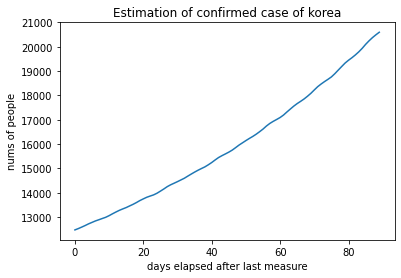

In [15]:
plt.plot((korea_z_hat_confirmed * korea[0].std() + korea[0].mean())[len(korea_z[0]):])
plt.title("Estimation of confirmed case of korea")
plt.xlabel("days elapsed after last measure")
plt.ylabel("nums of people")
plt.show()

마찬가지의 방법으로 사망자와 완치자 수에 대해서도 분석할 수 있다.

In [16]:
h = 90
T = len(korea[1])
X = np.zeros((T-h, h+1))
y = np.zeros(T-h)

for row in range(len(X)):
  for col in range(len(X[row])):
    if col == 0:
      X[row,col] = 1
    else:
      X[row,col] = korea_z[1][row + col - 1]

for i in range(len(y)):
  y[i] = korea_z[1][h+i]

theta = np.linalg.lstsq(X, y, rcond=0)[0]

korea_z_hat_recovered = list(korea_z[1].copy())

for i in range(90):
  temp = [1]
  temp.extend(korea_z_hat_recovered[-h:])
  korea_z_hat_recovered.append(np.dot(temp, theta))

korea_z_hat_recovered = np.array(korea_z_hat_recovered)

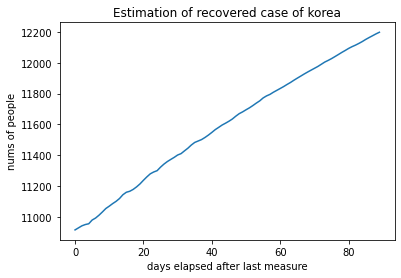

In [17]:
plt.plot((korea_z_hat_recovered * korea[1].std() + korea[1].mean())[len(korea_z[0]):])
plt.title("Estimation of recovered case of korea")
plt.xlabel("days elapsed after last measure")
plt.ylabel("nums of people")
plt.show()

In [18]:
h = 90
T = len(korea[2])
X = np.zeros((T-h, h+1))
y = np.zeros(T-h)

for row in range(len(X)):
  for col in range(len(X[row])):
    if col == 0:
      X[row,col] = 1
    else:
      X[row,col] = korea_z[2][row + col - 1]

for i in range(len(y)):
  y[i] = korea_z[2][h+i]

theta = np.linalg.lstsq(X, y, rcond=0)[0]

korea_z_hat_deaths = list(korea_z[2].copy())

for i in range(90):
  temp = [1]
  temp.extend(korea_z_hat_deaths[-h:])
  korea_z_hat_deaths.append(np.dot(temp, theta))

korea_z_hat_deaths = np.array(korea_z_hat_deaths)

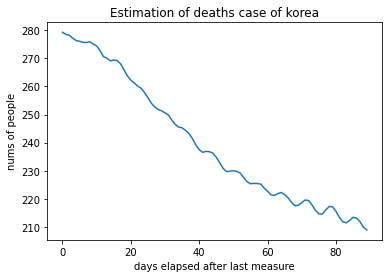

In [19]:
plt.plot((korea_z_hat_deaths * korea[2].std() + korea[2].mean())[len(korea_z[0]):])
plt.title("Estimation of deaths case of korea")
plt.xlabel("days elapsed after last measure")
plt.ylabel("nums of people")
plt.show()

사망자 수가 감소하는 말도 안 되는 일이 일어났지만, 아무튼 확진자, 완치자, 사망자 수를 기반으로 active case도 추정해보고 이를 기반으로 미래의 그래프를 그려보자. 사망자 수가 제대로 추정되지 않는 이유는 시간이 어느 정도 지나고 난 이후에는 사망자 수의 변화가 거의 없었기 때문일 것이다.

우선 표준화한 자료들을 원래 값으로 되돌린 후, (active case) = (확진자) - (완치자) - (사망자)로 계산할 수 있다.

In [20]:
korea_hat_confirmed = korea_z_hat_confirmed * korea[0].std() + korea[0].mean()
korea_hat_recovered = korea_z_hat_recovered * korea[1].std() + korea[1].mean()
korea_hat_deaths = korea_z_hat_deaths * korea[2].std() + korea[2].mean()
korea_hat_active = korea_hat_confirmed - korea_hat_recovered - korea_hat_deaths

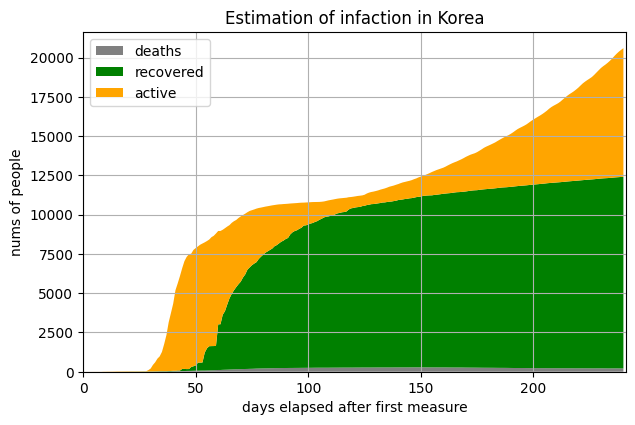

In [21]:
plt.figure(figsize=(7,4.5), dpi = 100)
plt.stackplot([i for i in range(len(korea[0]) + 90)], korea_hat_deaths, korea_hat_recovered, korea_hat_active, colors=['gray', 'green', 'orange'])
plt.title("Estimation of infaction in Korea")
plt.xlim(0, (len(korea[0]) + 90))
plt.grid()
plt.xlabel("days elapsed after first measure")
plt.ylabel("nums of people")
plt.legend(['deaths', 'recovered', 'active'], loc='upper left')
plt.show()

위 그래프대로라면 감염자 수는 계속해서 지수적으로 증가할 것이다. 지금까지 감염자 수가 폭발적으로 증가했던 나라들도 결국 언젠가는 감염 추세가 안정되었던 것을 보면, 위 추정이 그렇게까지 현실적으로 보이지는 않는다.

이번에는 몬테-카를로 방법을 이용해 분석해보자. 먼저 확진자 수의 증가율을 계산하고, 증가율의 표준편차를 계산한다.

In [22]:
confirmed_r_t = np.zeros(len(korea[0]))
for i in range(1, len(korea[0])):
  confirmed_r_t[i] = (korea[0,i] - korea[0,i-1]) / korea[0,i-1]

confirmed_r_avg = sum(confirmed_r_t) / len(confirmed_r_t)

confirmed_r_sigma = np.sqrt((1/len(korea[0])) * sum((confirmed_r_t - confirmed_r_avg)**2))

그 다음에는 이를 이용하여
$$
  confirmed_{t+1} = confirmed_{t}\left( 1+\tilde{r}_{t}\right)
$$
로 미래의 확진자 수를 추정한다. 이때 r_t는 평균이 confirmed_r_t의 평균이고, 표준편차는 저 리스트의 표준편차 confirmed_r_sigma와 같다.

In [23]:
monte_confirmed = list(korea[0].copy())
random_list = np.random.randn(90)*confirmed_r_sigma + confirmed_r_avg
for i in range(len(korea[0]), len(korea[0])+90):
  monte_confirmed.append(monte_confirmed[i-1]*(1+random_list[i - len(korea[0])]))

이 추정은 단기적으로는 어느 정도 들어맞지만, 그 와중에도 사망자 수가 감소하는 비현실적인 추정이 발생하고 있다. 또한 위와 같은 추세가 계속된다면 감염자 수가 지수적으로 계속해서 증가할 것인데, 이는 한국의 감염자 수가 한국의 인구 수를 뛰어넘을 수 없다는 기본적인 사실과도 충돌하며, 정부나 기관의 추가적인 방역 대책을 고려하지 않은 추정이므로 어느 정도 비현실적일 수밖에 없다. 이런 것까지 고려하려면 RIS 모델 등 역학조사에서 사용되는 복잡한 방법이 필요할 것이다.

참조: https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology